In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack
from math import *
from sklearn.neighbors import KDTree
from lrg_plot_functions import *
from lrg_sum_functions import *
from cosmo_Calc import *
from divideByTwo import *
from read_data import *
from nearNeighbors import *
from scipy import stats
from astropy import stats
import healpy as hp
from localBKG_and_interlopersHEALPix import *
# import healpy as hpy
from makeCutoutTableFunc import *
from plotHistogramProjections3D import *

In [2]:
# read in EAZY outputs
# only need 3rd, 6th, and 7th columns

data_UV = open('/Users/mtownsend/eazy-photoz/inputs/OUTPUT/UVISTA_master_v4.1/UVISTA_final_v4.1.153-155.rf', 'r')
# data_z = open('/Users/mtownsend/eazy-photoz/inputs/OUTPUT/UVISTA_master_v4.1/UVISTA_master_v4.1.83.rf', 'r')
data_VJ = open('/Users/mtownsend/eazy-photoz/inputs/OUTPUT/UVISTA_master_v4.1/UVISTA_master_v4.1.155-161.rf', 'r')
data_muzzin_UV = open('/Users/mtownsend/eazy-photoz/inputs/OUTPUT/UVISTA_master_v4.1/UVISTA_final_v4.1.153-155.rf', 'r')
data_muzzin_VJ = open('/Users/mtownsend/eazy-photoz/inputs/OUTPUT/UVISTA_master_v4.1/UVISTA_final_v4.1.155-161.rf', 'r')
data_g = open('/Users/mtownsend/eazy-photoz/inputs/OUTPUT/UVISTA_master_v4.1/UVISTA_master_v4.1.80-81.rf', 'r')
# lines_z = data_z.readlines()[10:]
lines_UV = data_UV.readlines()[11:]
lines_VJ = data_VJ.readlines()[11:]
lines_muzzin_UV = data_muzzin_UV.readlines()[11:]
lines_muzzin_VJ = data_muzzin_VJ.readlines()[11:]
lines_g = data_g.readlines()[11:]

# print(lines)

redshift_g = []
DM_g = []
gfilter = []
for line in lines_g:
    q = line.split()
    redshift_g.append(float(q[1]))
    DM_g.append(float(q[2]))
    gfilter.append(float(q[5]))

zspec = np.array(redshift_g)
DMarr_g = np.array(DM_g)
gflux = np.array(gfilter)    

# z = []
DM_UV = []
# DM_z = []
DM_VJ = []
Ufilter_UV = []
Vfilter_UV = []
# Ufilter_muzzin_UV = []
# Vfilter_muzzin_UV = []
# zfilter = []
# Vfilter_VJ = []
# Jfilter_VJ = []
# Vfilter_muzzin_VJ = []
# Jfilter_muzzin_VJ = []

for line in lines_UV:
    p = line.split()
#     z.append(float(p[1]))
#     redshift_UV.append(float(p[1]))
    DM_UV.append(float(p[2]))
    Ufilter_UV.append(float(p[5]))
    Vfilter_UV.append(float(p[6]))
    
# for line in lines_muzzin_UV:
#     p = line.split()
# #     z.append(float(p[1]))
# #     redshift_UV.append(float(p[1]))
# #     DM_UV.append(float(p[2]))
#     Ufilter_muzzin_UV.append(float(p[5]))
#     Vfilter_muzzin_UV.append(float(p[6]))
    
# for line in lines_z:
#     q = line.split()
# #     redshift_z.append(float())
#     DM_z.append(float(q[2]))
#     zfilter.append(float(q[5]))
    
# for line in lines_VJ:
#     r = line.split()
# #     redshift_z.append(float())
#     DM_VJ.append(float(r[2]))
#     Vfilter_VJ.append(float(r[5]))
#     Jfilter_VJ.append(float(r[6]))
    
# for line in lines_muzzin_VJ:
#     r = line.split()
# #     redshift_z.append(float())
# #     DM_VJ.append(float(r[2]))
#     Vfilter_muzzin_VJ.append(float(r[5]))
#     Jfilter_muzzin_VJ.append(float(r[6]))
    

# zspec = np.array(z)
DMarr_UV = np.array(DM_UV)
# DMarr_z = np.array(DM_z)
# DMarr_VJ = np.array(DM_VJ)
# zflux = np.array(zfilter)
Uflux_UV = np.array(Ufilter_UV)
Vflux_UV = np.array(Vfilter_UV)
# Uflux_muzzin_UV = np.array(Ufilter_muzzin_UV)
# Vflux_muzzin_UV = np.array(Vfilter_muzzin_UV)
# Vflux_VJ = np.array(Vfilter_VJ)
# Jflux_VJ = np.array(Jfilter_VJ)
# Vflux_muzzin_VJ = np.array(Vfilter_muzzin_VJ)
# Jflux_muzzin_VJ = np.array(Jfilter_muzzin_VJ)


# UltraVISTA apparent magnitudes

from astropy.io import ascii
data_cat = ascii.read("/Users/mtownsend/eazy-photoz/inputs/UVISTA_master_v4.1.cat")  
# print(data_cat)   

# print(len(data_cat['gp']))
gp = data_cat['gp']
rp = data_cat['rp']
zp = data_cat['zp']
use = data_cat['USE']
star = data_cat['star']
contamination = data_cat['contamination']
nan_contam = data_cat['nan_contam']
# z = data_cat['z_spec']

cut = np.where((use == 1.) & (star == 0.) & (contamination == 0.) & (nan_contam < 3.)) # & (Uflux > 0.) & (Vflux > 0.) & (zflux > 0.)) # & (zp > 0.))

gmag = np.array(25. - 2.5 * np.log10(gp[cut]))
zmag = np.array(25. - 2.5 * np.log10(zp[cut]))
z = np.array(zspec[cut])
DM = np.array(DMarr_g[cut])
flux_g = np.array(gflux[cut])
DM_UV = np.array(DMarr_UV[cut])
Uflux = np.array(Uflux_UV[cut])
Vflux = np.array(Vflux_UV[cut])
# print(len(gmag))
# print(len(zp))

# print(len(gflux))
# print(len(gflux[cut]))
# print(type(gmag))
# print(len(gmag))
# plt.hist(zmag[np.where(zmag > 0)])
# plt.show()
# print(len(zmag[np.where(zmag < 0.)]))

gmag_cut = gmag[np.where((np.isnan(gmag) == False) & (np.isnan(zmag) == False))]
zmag_cut = zmag[np.where((np.isnan(gmag) == False) & (np.isnan(zmag) == False))]
zspec_cut = z[np.where((np.isnan(gmag) == False) & (np.isnan(zmag) == False))]
DM_cut = DM[np.where((np.isnan(gmag) == False) & (np.isnan(zmag) == False))]
gflux_cut = flux_g[np.where((np.isnan(gmag) == False) & (np.isnan(zmag) == False))]
print(len(gmag_cut))
print(len(zmag_cut))
print(len(zspec_cut))
print(len(DM_cut))
print(len(gflux_cut))
DM_UV_cut = DM_UV[np.where((np.isnan(gmag) == False) & (np.isnan(zmag) == False))]
Uflux_cut = Uflux[np.where((np.isnan(gmag) == False) & (np.isnan(zmag) == False))]
Vflux_cut = Vflux[np.where((np.isnan(gmag) == False) & (np.isnan(zmag) == False))]
print(len(DM_UV_cut))
print(len(Uflux_cut))
print(len(Vflux_cut))


164011
164011
164011
164011
164011
164011
164011
164011


/Users/mtownsend/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:116: RuntimeWarning: divide by zero encountered in log10
/Users/mtownsend/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:116: RuntimeWarning: invalid value encountered in log10
/Users/mtownsend/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:117: RuntimeWarning: invalid value encountered in log10


In [3]:
# Calculate (U-V) color and rest frame Vmag

# K correction
K_correct = -2.5*np.log10((1. + zspec_cut)**-1.)

# (U-V) color
UVcolor = -2.5*np.log10(Uflux_cut/Vflux_cut)
# VJcolor = -2.5*np.log10(Vflux_VJ[cut]/Jflux_VJ[cut])

# UVcolor_muzzin = -2.5*np.log10(Uflux_muzzin_UV[cut]/Vflux_muzzin_UV[cut])
# VJcolor_muzzin = -2.5*np.log10(Vflux_muzzin_VJ[cut]/Jflux_muzzin_VJ[cut])

# Absolute magnitude
MV = -2.5*np.log10(Vflux_cut) + 25. - DM_UV_cut - K_correct
MU = -2.5*np.log10(Uflux_cut) + 25. - DM_UV_cut - K_correct
# zMag = -2.5*np.log10(zflux[cut]) + 25. - DMarr_z[cut] - K_correct
# MJ = -2.5*np.log10(Jflux[cut]) + 25. - DMarr_J[cut] - K_correct

# V band magnitude of the sun
Msun_V = 4.80 # AB magnitude

# Luminosity
LV = 10.**((MV-Msun_V)/(-2.5))

log_LV = np.log10(LV)


# Calculate rest frame gmag

# Msun_z = 4.50
Msun_g = 5.05


gMag = -2.5*np.log10(gflux_cut) + 25. - DM_cut - K_correct
gLum = 10.**((gMag-Msun_g)/(-2.5))

log_gLum = np.log10(gLum)

# print(type(log_LV))
print(type(log_gLum))

# print(log_zLum[np.where(log_zLum != 'nan')])
# print(log_LV[np.where(log_LV != 'nan')])

<class 'numpy.ndarray'>


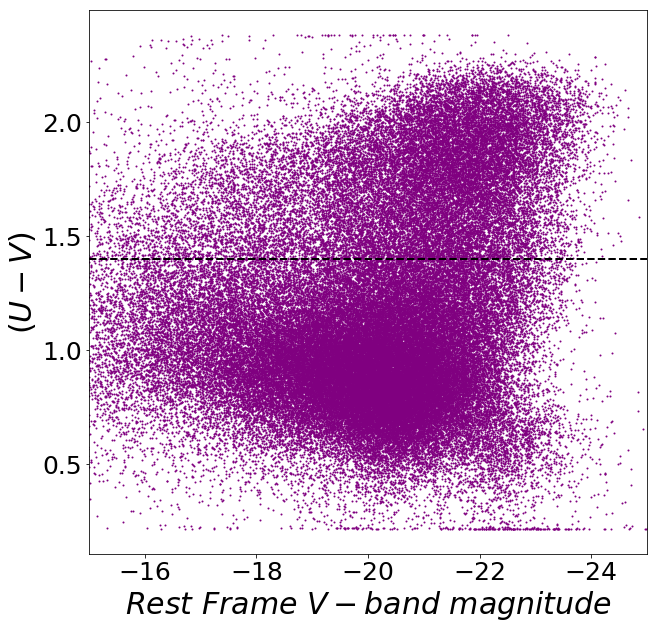

In [4]:
# Plot (U-V) vs. V

# zphot = zspec[np.where((Uflux_cut > 0) & (Vflux_cut > 0) & (use == 1) & (zspec_cut > 0.1))]

f, ax = plt.subplots(figsize=(10,10))
# ax.scatter(MV[np.where((zphot < 1))], UVcolor[np.where(zphot < 1)], s=1, c='purple')
ax.scatter(MV[np.where(zspec_cut < 1)], UVcolor[np.where(zspec_cut < 1)], s=1, c='purple')
# plt.title("UVista (U-V) vs V (z < 1)", fontsize=22)
plt.xlabel(r'$Rest$ $Frame$ $V-band$ $magnitude$', fontsize=30)
plt.ylabel(r'$(U-V)$', fontsize=30)
plt.xlim(-25, -15)
plt.axhline(y=1.4, color='black', linewidth=2, ls='--')
plt.tick_params(axis='both', which='major', labelsize=25)
plt.gca().invert_xaxis()
# plt.legend(loc='lower right', fontsize=15, markerscale=5)
# plt.savefig('/Users/mtownsend/Desktop/U-V_CMD-v5.jpeg')
# plt.savefig('/Users/mtownsend/Desktop/NewPaperPlots/U-V_CMD-v7.pdf')
plt.show()


# # Plot redshift distribution

# f, ax = plt.subplots(figsize=(10,10))
# ax.hist(zphot, bins=50, color='purple')
# plt.title("UVista Redshift Distribution", fontsize=22)
# plt.xlabel(r'$redshift$', fontsize=20)
# plt.ylabel(r'$counts$', fontsize=20)
# plt.tick_params(axis='both', which='major', labelsize=12)
# # plt.gca().invert_xaxis()
# # plt.legend(loc='lower right', fontsize=15, markerscale=5)
# plt.savefig('/Users/mtownsend/Desktop/UV_redshift_dist-v1.jpeg')
# plt.savefig('/Users/mtownsend/Desktop/UV_redshift_dist-v1.pdf')
# plt.show()

# Plot UVJ

# print(len(VJcolor[np.where(VJcolor == 0)]))
# print(len(VJcolor[np.where(VJcolor > 0)]))

# f, ax = plt.subplots(figsize=(10,10))
# # ax.scatter(MV[np.where((zphot < 1))], UVcolor[np.where(zphot < 1)], s=1, c='purple')
# ax.scatter(VJcolor, UVcolor, s=1, c='purple')
# plt.title("UVista (U-V) vs (V-J))", fontsize=22)
# plt.xlabel(r'$(V-J)$', fontsize=20)
# plt.ylabel(r'$(U-V)$', fontsize=20)
# # plt.xlim(-0.5, 2.)
# # plt.ylim(0., 2.5)
# plt.tick_params(axis='both', which='major', labelsize=12)
# # plt.gca().invert_xaxis()
# # plt.legend(loc='lower right', fontsize=15, markerscale=5)
# # plt.savefig('/Users/mtownsend/Desktop/U-V_CMD-v5.jpeg')
# # plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/U-V_CMD-v6.pdf')
# plt.show()

# f, ax = plt.subplots(figsize=(10,10))
# # ax.scatter(MV[np.where((zphot < 1))], UVcolor[np.where(zphot < 1)], s=1, c='purple')
# ax.scatter(VJcolor_muzzin, UVcolor_muzzin, s=1, c='purple')
# plt.title("UVista (U-V) vs (V-J))", fontsize=22)
# plt.xlabel(r'$(V-J)$', fontsize=20)
# plt.ylabel(r'$(U-V)$', fontsize=20)
# # plt.xlim(-0.5, 2.)
# # plt.ylim(0., 2.5)
# plt.tick_params(axis='both', which='major', labelsize=12)
# # plt.gca().invert_xaxis()
# # plt.legend(loc='lower right', fontsize=15, markerscale=5)
# # plt.savefig('/Users/mtownsend/Desktop/U-V_CMD-v5.jpeg')
# # plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/U-V_CMD-v6.pdf')
# plt.show()

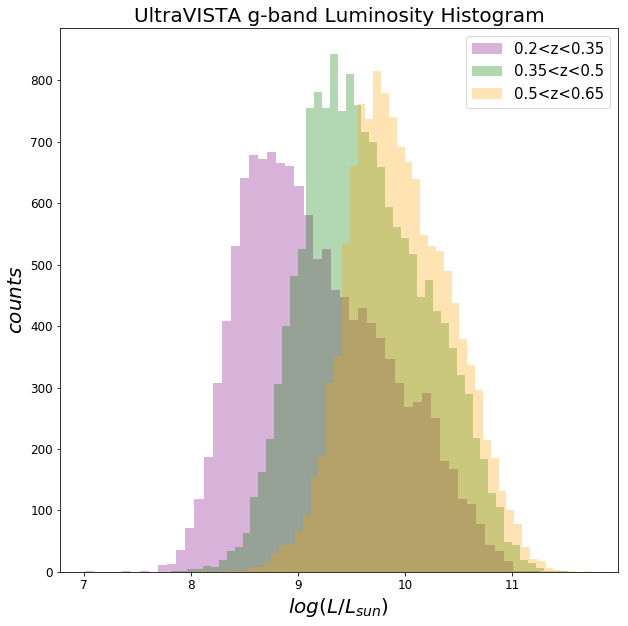

In [6]:
plt.subplots(figsize=(10,10))
# plt.hist(log_LV[np.where((zspec[cut] > 0.55) & (zspec[cut] < 0.65))], bins=50, alpha=0.3, color='purple', label="0.55<z<0.65", normed='True')
plt.hist(log_gLum[np.where((zspec_cut > 0.2) & (zspec_cut < 0.35))], bins=50, alpha=0.3, color='purple', label="0.2<z<0.35") #, normed='True')
plt.hist(log_gLum[np.where((zspec_cut > 0.35) & (zspec_cut < 0.5))], bins=50, alpha=0.3, color='green', label="0.35<z<0.5") #, normed='True')
plt.hist(log_gLum[np.where((zspec_cut > 0.5) & (zspec_cut < 0.65))], bins=50, alpha=0.3, color='orange', label="0.5<z<0.65") #, normed='True')
# plt.hist(log_gLum[np.where((zspec_cut > 0.5) & (zspec_cut < 0.6))], bins=50, alpha=0.3, color='blue', label="0.5<z<0.6") #, normed='True')
# plt.hist(log_gLum[np.where((zspec_cut > 0.6) & (zspec_cut < 0.65))], bins=50, alpha=0.3, color='red', label="0.6<z<0.65") #, normed='True')
plt.title("UltraVISTA g-band Luminosity Histogram", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$counts$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc='upper right', fontsize=15)
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/7May2020/UV_glum_hist_redshift_cut-v2.jpeg')
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/7May2020/UV_glum_hist_redshift_cut-v2.pdf')
plt.show()

# plt.scatter(log_zLum, zspec[cut])
# plt.show()


<class 'numpy.ndarray'>
29430


/Users/mtownsend/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


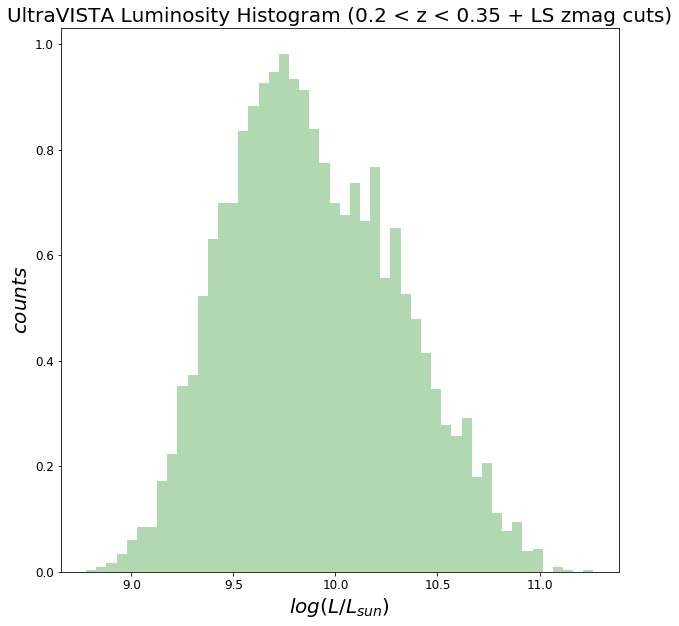

In [8]:
print(type(zmag))
# print(len(log_zLum))
print(len(zmag[np.where(zmag < 22.36)]))

plt.subplots(figsize=(10,10))
plt.hist(log_gLum[np.where((zspec_cut > 0.2) & (zspec_cut < 0.35) & (zmag_cut < 22.36))], bins=50, alpha=0.3, color='green', normed='True')
plt.title("UltraVISTA Luminosity Histogram (0.2 < z < 0.35 + LS zmag cuts)", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$counts$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
# plt.legend(loc='upper right', fontsize=15)
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/UV_zlum_hist_redshift_LSzmag_cut-v1.jpeg')
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/UV_zlum_hist_redshift_LSzmag_cut-v1.pdf')
plt.show()


[ 8.09113104  8.1644214   8.23771175  8.31100211  8.38429247  8.45758283
  8.53087319  8.60416355  8.6774539   8.75074426  8.82403462  8.89732498
  8.97061534  9.0439057   9.11719606  9.19048641  9.26377677  9.33706713
  9.41035749  9.48364785  9.55693821  9.63022856  9.70351892  9.77680928
  9.85009964  9.92339     9.99668036 10.06997071 10.14326107 10.21655143
 10.28984179 10.36313215 10.43642251 10.50971286 10.58300322 10.65629358
 10.72958394 10.8028743  10.87616466 10.94945501 11.02274537 11.09603573
 11.16932609 11.24261645 11.31590681 11.38919716 11.46248752 11.53577788
 11.60906824 11.6823586  11.75564896]
----
[0.                nan        nan 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.01216216 0.06078148 0.14392804 0.25625    0.44343066 0.67419962
 0.8833652  0.93456033 0.98401826 1.         0.99109792 1.
 1.        

/Users/mtownsend/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


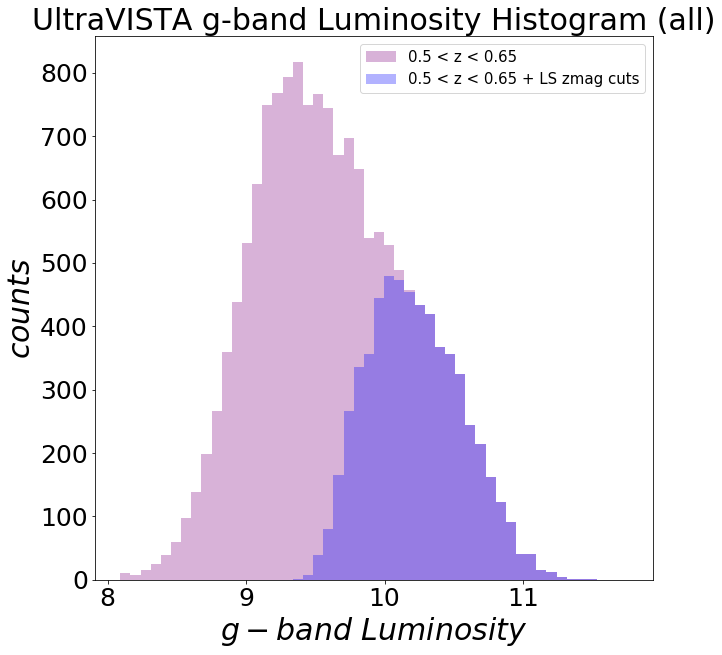

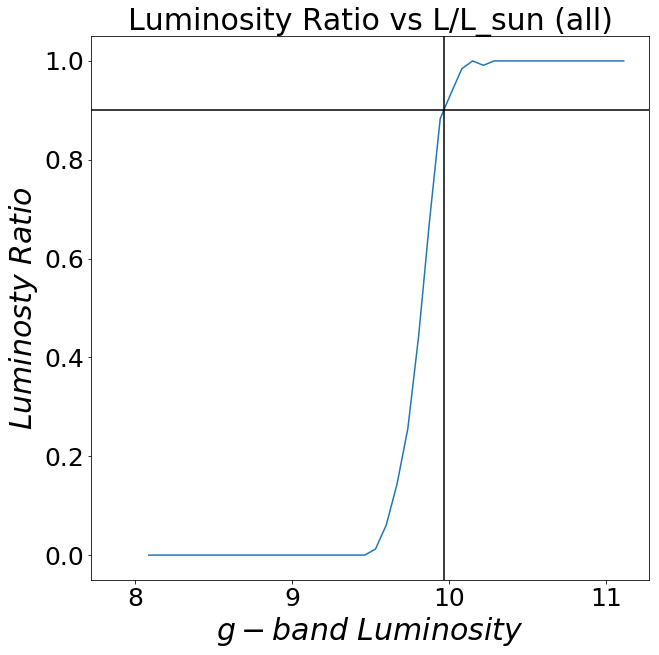

In [58]:
# Make completeness cuts in the z-band for combined red and blue sources

UV_zcut_all, zcut_bins_all = np.histogram(log_gLum[np.where((zspec_cut > 0.5) & (zspec_cut < 0.65))], bins=50)
UV_LScut_all, nouse_bins = np.histogram(log_gLum[np.where((zspec_cut > 0.5) & (zspec_cut < 0.65) & (zmag_cut < 22.36))], bins=zcut_bins_all)
print(zcut_bins_all)
print('----')
# print(LScut_bins)

ratio_all = UV_LScut_all/UV_zcut_all
print(ratio_all)

plt.subplots(figsize=(10,10))
plt.hist(log_gLum[np.where((zspec_cut > 0.35) & (zspec_cut < 0.5))], bins=zcut_bins_all, alpha=0.3, color='purple', label="0.5 < z < 0.65")
plt.hist(log_gLum[np.where((zspec_cut > 0.35) & (zspec_cut < 0.5) & (zmag_cut < 22.36))], bins=zcut_bins_all, alpha=0.3, color='blue', label="0.5 < z < 0.65 + LS zmag cuts")
plt.title("UltraVISTA g-band Luminosity Histogram (all)", fontsize=30)
plt.xlabel(r'$g-band$ $Luminosity$', fontsize=30)
plt.ylabel(r'$counts$', fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.legend(loc='upper right', fontsize=15)
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/7May2020/lum_hist_UVandUVzcut_all_low_redshift-v1.pdf')
# plt.savefig('/Users/mtownsend/Desktop/NewPaperPlots/lum_hist_UVandUVzcut_z_notNormalized_all-v1.pdf')
plt.show()

# # 0.2 < z < 0.35
# bins_minus_one = [7.09526256,  7.18034029,  7.26541801,  7.35049573,  7.43557345,
#   7.52065117,  7.60572889,  7.69080661,  7.77588434,  7.86096206,  7.94603978,
#   8.0311175,   8.11619522,  8.20127294,  8.28635066,  8.37142839,  8.45650611,
#   8.54158383,  8.62666155,  8.71173927,  8.79681699,  8.88189471,  8.96697244,
#   9.05205016,  9.13712788,  9.2222056,   9.30728332,  9.39236104,  9.47743876,
#   9.56251649,  9.64759421,  9.73267193,  9.81774965,  9.90282737,  9.98790509,
#  10.07298281, 10.15806054, 10.24313826, 10.32821598, 10.4132937,  10.49837142,
#  10.58344914, 10.66852686, 10.75360459, 10.83868231, 10.92376003, 11.00883775,
#  11.09391547, 11.17899319]

# # 0.35 < z < 0.5
# bins_minus_one = [7.88702844,  7.96123757,  8.0354467,   8.10965584,  8.18386497,
#   8.2580741,   8.33228324,  8.40649237,  8.4807015,   8.55491064,  8.62911977,
#   8.7033289,   8.77753804,  8.85174717,  8.9259563,   9.00016544,  9.07437457,
#   9.1485837,   9.22279284,  9.29700197,  9.3712111,   9.44542024,  9.51962937,
#   9.5938385,   9.66804764,  9.74225677,  9.8164659,   9.89067504,  9.96488417,
#  10.0390933,  10.11330244, 10.18751157, 10.2617207,  10.33592984, 10.41013897,
#  10.4843481,  10.55855724, 10.63276637, 10.7069755,  10.78118464, 10.85539377,
#  10.92960291, 11.00381204, 11.07802117, 11.15223031, 11.22643944, 11.30064857,
#  11.37485771, 11.44906684]

# 0.5 < z < 0.65
bins_minud_one = [8.1644214,   8.23771175,  8.31100211,  8.38429247,  8.45758283,
  8.53087319,  8.60416355,  8.6774539,   8.75074426,  8.82403462,  8.89732498,
  8.97061534,  9.0439057,   9.11719606,  9.19048641,  9.26377677,  9.33706713,
  9.41035749,  9.48364785,  9.55693821,  9.63022856,  9.70351892,  9.77680928,
  9.85009964,  9.92339,     9.99668036, 10.06997071, 10.14326107, 10.21655143,
 10.28984179, 10.36313215, 10.43642251, 10.50971286, 10.58300322, 10.65629358,
 10.72958394, 10.8028743,  10.87616466, 10.94945501, 11.02274537, 11.09603573,
 11.16932609, 11.24261645, 11.31590681, 11.38919716, 11.46248752, 11.53577788,
 11.60906824, 11.6823586]

# # 0.55 < z < 0.65
# bins_minus_one = [8.25004527,  8.32203478,  8.3940243,   8.46601381,  8.53800333,
#   8.60999284,  8.68198236,  8.75397187,  8.82596139,  8.8979509,   8.96994042,
#   9.04192993,  9.11391945,  9.18590896,  9.25789848,  9.32988799,  9.40187751,
#   9.47386702,  9.54585654,  9.61784605,  9.68983557,  9.76182508,  9.8338146,
#   9.90580411,  9.97779363, 10.04978314, 10.12177266, 10.19376217, 10.26575169,
#  10.3377412,  10.40973072, 10.48172023, 10.55370975, 10.62569926, 10.69768878,
#  10.76967829, 10.84166781, 10.91365732, 10.98564684, 11.05763635, 11.12962587,
#  11.20161538, 11.2736049,  11.34559441, 11.41758393, 11.48957344, 11.56156296,
#  11.63355247, 11.70554199]

# # 0.2 < z < 0.3
# bins_minus_one = [7.09232906,  7.17447328,  7.25661751,  7.33876173,  7.42090595,
#   7.50305017,  7.58519439,  7.66733861,  7.74948283,  7.83162705,  7.91377127,
#   7.99591549,  8.07805971,  8.16020393,  8.24234815,  8.32449237,  8.4066366,
#   8.48878082,  8.57092504,  8.65306926,  8.73521348,  8.8173577,   8.89950192,
#   8.98164614,  9.06379036,  9.14593458,  9.2280788,   9.31022302,  9.39236724,
#   9.47451146,  9.55665569,  9.63879991,  9.72094413,  9.80308835,  9.88523257,
#   9.96737679, 10.04952101, 10.13166523, 10.21380945, 10.29595367, 10.37809789,
#  10.46024211, 10.54238633, 10.62453055, 10.70667478, 10.788819,   10.87096322,
#  10.95310744, 11.03525166]

# # 0.3 < z < 0.4
# bins_minus_one = [7.89022806,  7.9643719,   8.03851573,  8.11265956,  8.1868034,
#   8.26094723,  8.33509107,  8.4092349,   8.48337874,  8.55752257,  8.63166641,
#   8.70581024,  8.77995408,  8.85409791,  8.92824175,  9.00238558,  9.07652942,
#   9.15067325,  9.22481709,  9.29896092,  9.37310476,  9.44724859,  9.52139243,
#   9.59553626,  9.6696801,   9.74382393,  9.81796777,  9.8921116,   9.96625544,
#  10.04039927, 10.11454311, 10.18868694, 10.26283078, 10.33697461, 10.41111845,
#  10.48526228, 10.55940612, 10.63354995, 10.70769379, 10.78183762, 10.85598146,
#  10.93012529, 11.00426913, 11.07841296, 11.1525568, 11.22670063, 11.30084447,
#  11.3749883,  11.44913214]

# 0.4 < z < 0.55
# bins_minus_one = [7.8858378,   7.95885629,  8.03187478,  8.10489328,  8.17791177,
#   8.25093027,  8.32394876,  8.39696725,  8.46998575,  8.54300424,  8.61602273,
#   8.68904123,  8.76205972,  8.83507822,  8.90809671,  8.9811152,   9.0541337,
#   9.12715219,  9.20017068,  9.27318918,  9.34620767,  9.41922616,  9.49224466,
#   9.56526315,  9.63828165,  9.71130014,  9.78431863,  9.85733713,  9.93035562,
#  10.00337411, 10.07639261, 10.1494111,  10.22242959, 10.29544809, 10.36846658,
#  10.44148508, 10.51450357, 10.58752206, 10.66054056, 10.73355905, 10.80657754,
#  10.87959604, 10.95261453, 11.02563302, 11.09865152, 11.17167001, 11.24468851,
#  11.317707,   11.39072549]

# # 0.4 < z < 0.5
# bins_minus_one = [7.8858378,   7.95885629,  8.03187478,  8.10489328,  8.17791177,
#   8.25093027,  8.32394876,  8.39696725,  8.46998575,  8.54300424,  8.61602273,
#   8.68904123,  8.76205972,  8.83507822,  8.90809671,  8.9811152,   9.0541337,
#   9.12715219,  9.20017068,  9.27318918,  9.34620767,  9.41922616,  9.49224466,
#   9.56526315,  9.63828165,  9.71130014,  9.78431863,  9.85733713,  9.93035562,
#  10.00337411, 10.07639261, 10.1494111,  10.22242959, 10.29544809, 10.36846658,
#  10.44148508, 10.51450357, 10.58752206, 10.66054056, 10.73355905, 10.80657754,
#  10.87959604, 10.95261453, 11.02563302, 11.09865152, 11.17167001, 11.24468851,
#  11.317707,   11.39072549]

# 0.5 < z < 0.6
# bins_minus_one = [8.15946544,  8.22779984,  8.29613425,  8.36446865,  8.43280305,
#   8.50113745,  8.56947186,  8.63780626,  8.70614066,  8.77447506,  8.84280947,
#   8.91114387,  8.97947827,  9.04781267,  9.11614708,  9.18448148,  9.25281588,
#   9.32115029,  9.38948469,  9.45781909,  9.52615349,  9.5944879,   9.6628223,
#   9.7311567,   9.7994911,   9.86782551,  9.93615991, 10.00449431, 10.07282871,
#  10.14116312, 10.20949752, 10.27783192, 10.34616632, 10.41450073, 10.48283513,
#  10.55116953, 10.61950394, 10.68783834, 10.75617274, 10.82450714, 10.89284155,
#  10.96117595, 11.02951035, 11.09784475, 11.16617916, 11.23451356, 11.30284796,
#  11.37118236, 11.43951677]

# 0.6 < z < 0.65
# bins_minus_one = [8.73412853,  8.79579222,  8.8574559,   8.91911958,  8.98078326,
#   9.04244695,  9.10411063,  9.16577431,  9.22743799,  9.28910167,  9.35076536,
#   9.41242904,  9.47409272,  9.5357564,   9.59742008,  9.65908377,  9.72074745,
#   9.78241113,  9.84407481,  9.90573849,  9.96740218, 10.02906586, 10.09072954,
#  10.15239322, 10.2140569,  10.27572059, 10.33738427, 10.39904795, 10.46071163,
#  10.52237531, 10.584039,   10.64570268, 10.70736636, 10.76903004, 10.83069373,
#  10.89235741, 10.95402109, 11.01568477, 11.07734845, 11.13901214, 11.20067582,
#  11.2623395,  11.32400318, 11.38566686, 11.44733055, 11.50899423, 11.57065791,
#  11.63232159, 11.69398527]

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(bins_minus_one, ratio_all[:-1])
plt.axhline(y=0.9, color='black')
plt.axvline(x=9.97, color='black')
plt.title("Luminosity Ratio vs L/L_sun (all)", fontsize=30)
plt.xlabel(r'$g-band$ $Luminosity$', fontsize=30)
plt.ylabel(r'$Luminosty$ $Ratio$', fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=25)
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/06Aug2020/luminosity_hist_ratio_all_0.4-0.55.pdf')
# plt.savefig('/Users/mtownsend/Desktop/NewPaperPlots/luminosity_hist_ratio_all-v4.pdf')
fig.show()


In [59]:
# zLum_cut = log_zLum[cut]

log_gLum_blue_LS = log_gLum[np.where((UVcolor < 1.4) & (zspec_cut > 0.5) & (zspec_cut < 0.65) & (zmag_cut < 22.36))]
log_gLum_red_LS = log_gLum[np.where((UVcolor > 1.4) & (zspec_cut > 0.5) & (zspec_cut < 0.65) & (zmag_cut < 22.36))]

log_gLum_blue_z = log_gLum[np.where((UVcolor < 1.4) & (zspec_cut > 0.5) & (zspec_cut < 0.65))]
log_gLum_red_z = log_gLum[np.where((UVcolor > 1.4) & (zspec_cut > 0.5) & (zspec_cut < 0.65))]
   
    
print(len(log_gLum_blue_LS))
print(len(log_gLum_red_LS))
print(len(log_gLum_blue_z))
print(len(log_gLum_red_z))

1972
2102
9135
3556


[ 8.36965886  8.43050972  8.49136057  8.55221142  8.61306228  8.67391313
  8.73476398  8.79561483  8.85646569  8.91731654  8.97816739  9.03901824
  9.0998691   9.16071995  9.2215708   9.28242166  9.34327251  9.40412336
  9.46497421  9.52582507  9.58667592  9.64752677  9.70837763  9.76922848
  9.83007933  9.89093018  9.95178104 10.01263189 10.07348274 10.1343336
 10.19518445 10.2560353  10.31688615 10.37773701 10.43858786 10.49943871
 10.56028957 10.62114042 10.68199127 10.74284212 10.80369298 10.86454383
 10.92539468 10.98624554 11.04709639 11.10794724 11.16879809 11.22964895
 11.2904998  11.35135065 11.4122015 ]
----
[0.         0.                nan 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.01941748 0.17272727 0.27358491 0.42748092 0.50381679 0.62698413
 0.84285714 0.9558011  0.99300699 0.98823529 0.99319728 1.
 1.         

/Users/mtownsend/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


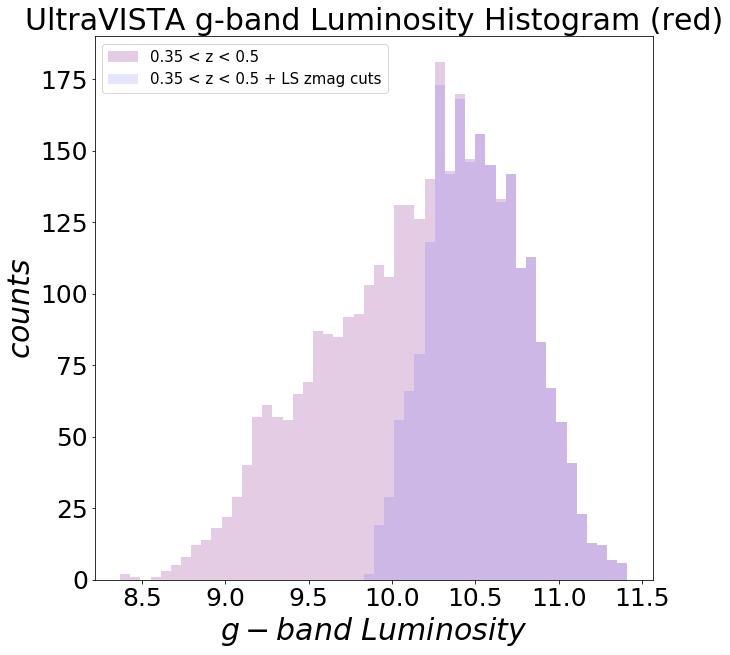

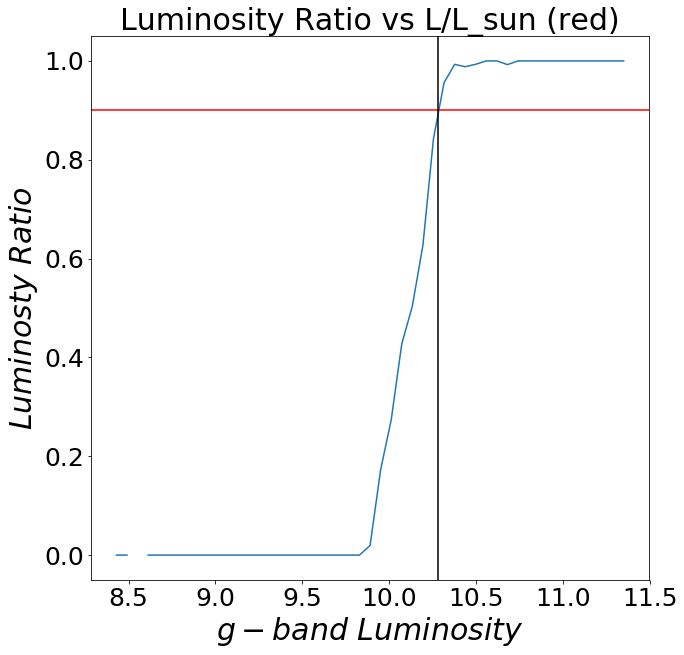

In [63]:
UV_zcut_red, zcut_bins_red = np.histogram(log_gLum_red_z, bins=50)
UV_LScut_red, nouse_bins = np.histogram(log_gLum_red_LS, bins=zcut_bins_red)
print(zcut_bins_red)
print('----')
# print(LScut_bins)

ratio_red = UV_LScut_red/UV_zcut_red
print(ratio_red)

plt.subplots(figsize=(10,10))
plt.hist(log_gLum_red_z, bins=zcut_bins_red, alpha=0.2, color='purple', label="0.35 < z < 0.5")
plt.hist(log_gLum_red_LS, bins=zcut_bins_red, alpha=0.1, color='blue', label="0.35 < z < 0.5 + LS zmag cuts")
plt.title("UltraVISTA g-band Luminosity Histogram (red)", fontsize=30)
plt.xlabel(r'$g-band$ $Luminosity$', fontsize=30)
plt.ylabel(r'$counts$', fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.legend(loc='upper left', fontsize=15)
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/7May2020/lum_hist_UVandUVzcut_low_redshift_red-v1.pdf')
# plt.savefig('/Users/mtownsend/Desktop/NewPaperPlots/lum_hist_UVandUVzcut_z_notNormalized_red-v2.pdf')
plt.show()

# # 0.2 < z < 0.35
# bins_minus_one = [7.82883119,  7.89893813,  7.96904506,  8.03915199,  8.10925892,
#   8.17936586,  8.24947279,  8.31957972,  8.38968666,  8.45979359,  8.52990052,
#   8.60000746,  8.67011439,  8.74022132,  8.81032826,  8.88043519,  8.95054212,
#   9.02064906,  9.09075599,  9.16086292,  9.23096985,  9.30107679,  9.37118372,
#   9.44129065,  9.51139759,  9.58150452,  9.65161145,  9.72171839,  9.79182532,
#   9.86193225,  9.93203919, 10.00214612, 10.07225305, 10.14235998, 10.21246692,
#  10.28257385, 10.35268078, 10.42278772, 10.49289465, 10.56300158, 10.63310852,
#  10.70321545, 10.77332238, 10.84342932, 10.91353625, 10.98364318, 11.05375011,
#  11.12385705, 11.19396398]

# # 0.35 < z < 0.5
# bins_minus_one = [7.97024948,  8.04276022,  8.11527097,  8.18778171,  8.26029246,
#   8.3328032,   8.40531395,  8.47782469,  8.55033544,  8.62284618,  8.69535693,
#   8.76786767,  8.84037841,  8.91288916,  8.9853999,   9.05791065,  9.13042139,
#   9.20293214,  9.27544288,  9.34795363,  9.42046437,  9.49297512,  9.56548586,
#   9.63799661,  9.71050735,  9.7830181,   9.85552884,  9.92803959, 10.00055033,
#  10.07306108, 10.14557182, 10.21808257, 10.29059331, 10.36310406, 10.4356148,
#  10.50812554, 10.58063629, 10.65314703, 10.72565778, 10.79816852, 10.87067927,
#  10.94319001, 11.01570076, 11.0882115,  11.16072225, 11.23323299, 11.30574374,
#  11.37825448, 11.45076523]

# # 0.55 < z < 0.65
# bins_minus_one = [8.84627288,  8.90512662,  8.96398035,  9.02283409,  9.08168782,
#   9.14054156,  9.19939529,  9.25824903,  9.31710277,  9.3759565,   9.43481024,
#   9.49366397,  9.55251771,  9.61137145,  9.67022518,  9.72907892,  9.78793265,
#   9.84678639,  9.90564013,  9.96449386, 10.0233476,  10.08220133, 10.14105507,
#  10.1999088,  10.25876254, 10.31761628, 10.37647001, 10.43532375, 10.49417748,
#  10.55303122, 10.61188496, 10.67073869, 10.72959243, 10.78844616, 10.8472999,
#  10.90615364, 10.96500737, 11.02386111, 11.08271484, 11.14156858, 11.20042231,
#  11.25927605, 11.31812979, 11.37698352, 11.43583726, 11.49469099, 11.55354473,
#  11.61239847, 11.6712522]

# # 0.2 < z < 0.3
# bins_minus_one = [7.82589769,  7.89307112,  7.96024456,  8.02741799,  8.09459142,
#   8.16176485,  8.22893829,  8.29611172,  8.36328515,  8.43045858,  8.49763202,
#   8.56480545,  8.63197888,  8.69915231,  8.76632575,  8.83349918,  8.90067261,
#   8.96784604,  9.03501947,  9.10219291,  9.16936634,  9.23653977,  9.3037132,
#   9.37088664,  9.43806007,  9.5052335,   9.57240693,  9.63958037,  9.7067538,
#   9.77392723,  9.84110066,  9.9082741,   9.97544753, 10.04262096, 10.10979439,
#  10.17696783, 10.24414126, 10.31131469, 10.37848812, 10.44566156, 10.51283499,
#  10.58000842, 10.64718185, 10.71435528, 10.78152872, 10.84870215, 10.91587558,
#  10.98304901, 11.05022245]

# # 0.3 < z < 0.4
# bins_minus_one = [7.89022806,  7.9643719,   8.03851573,  8.11265956,  8.1868034,
#   8.26094723,  8.33509107,  8.4092349,   8.48337874,  8.55752257,  8.63166641,
#   8.70581024,  8.77995408,  8.85409791,  8.92824175,  9.00238558,  9.07652942,
#   9.15067325,  9.22481709,  9.29896092,  9.37310476,  9.44724859,  9.52139243,
#   9.59553626,  9.6696801,   9.74382393,  9.81796777,  9.8921116,   9.96625544,
#  10.04039927, 10.11454311, 10.18868694, 10.26283078, 10.33697461, 10.41111845,
#  10.48526228, 10.55940612, 10.63354995, 10.70769379, 10.78183762, 10.85598146,
#  10.93012529, 11.00426913, 11.07841296, 11.1525568,  11.22670063, 11.30084447,
#  11.3749883,  11.44913214]

# 0.5 < z < 0.65
bins_minus_one = [8.43050972,  8.49136057,  8.55221142,  8.61306228,  8.67391313,
  8.73476398,  8.79561483,  8.85646569,  8.91731654,  8.97816739,  9.03901824,
  9.0998691,   9.16071995,  9.2215708,   9.28242166,  9.34327251,  9.40412336,
  9.46497421,  9.52582507,  9.58667592,  9.64752677,  9.70837763,  9.76922848,
  9.83007933,  9.89093018,  9.95178104, 10.01263189, 10.07348274, 10.1343336,
 10.19518445, 10.2560353,  10.31688615, 10.37773701, 10.43858786, 10.49943871,
 10.56028957, 10.62114042, 10.68199127, 10.74284212, 10.80369298, 10.86454383,
 10.92539468, 10.98624554, 11.04709639, 11.10794724, 11.16879809, 11.22964895,
 11.2904998,  11.35135065]

# 0.4 < z < 0.55
# bins_minus_one = [7.89022806,  7.9643719,   8.03851573,  8.11265956,  8.1868034,
#   8.26094723,  8.33509107,  8.4092349,   8.48337874,  8.55752257,  8.63166641,
#   8.70581024,  8.77995408,  8.85409791,  8.92824175,  9.00238558,  9.07652942,
#   9.15067325,  9.22481709,  9.29896092,  9.37310476,  9.44724859,  9.52139243,
#   9.59553626,  9.6696801,   9.74382393,  9.81796777,  9.8921116,   9.96625544,
#  10.04039927, 10.11454311, 10.18868694, 10.26283078, 10.33697461, 10.41111845,
#  10.48526228, 10.55940612, 10.63354995, 10.70769379, 10.78183762, 10.85598146,
#  10.93012529, 11.00426913, 11.07841296, 11.1525568,  11.22670063, 11.30084447,
#  11.3749883,  11.44913214]

# 0.4 < z < 0.5
# bins_minus_one = [8.22287409,  8.28901429,  8.35515449,  8.42129469,  8.4874349,
#   8.5535751,   8.6197153,   8.6858555,   8.7519957,   8.81813591,  8.88427611,
#   8.95041631,  9.01655651,  9.08269671,  9.14883692,  9.21497712,  9.28111732,
#   9.34725752,  9.41339772,  9.47953793,  9.54567813,  9.61181833,  9.67795853,
#   9.74409873,  9.81023894,  9.87637914,  9.94251934, 10.00865954, 10.07479974,
#  10.14093995, 10.20708015, 10.27322035, 10.33936055, 10.40550075, 10.47164096,
#  10.53778116, 10.60392136, 10.67006156, 10.73620176, 10.80234197, 10.86848217,
#  10.93462237, 11.00076257, 11.06690277, 11.13304298, 11.19918318, 11.26532338,
#  11.33146358, 11.39760378]

# # 0.5 < z < 0.6
# bins_minus_one = [8.43050972,  8.49136057,  8.55221142,  8.61306228,  8.67391313,
#   8.73476398,  8.79561483,  8.85646569,  8.91731654,  8.97816739,  9.03901824,
#   9.0998691,   9.16071995,  9.2215708,   9.28242166,  9.34327251,  9.40412336,
#   9.46497421,  9.52582507,  9.58667592,  9.64752677,  9.70837763,  9.76922848,
#   9.83007933,  9.89093018,  9.95178104, 10.01263189, 10.07348274, 10.1343336,
#  10.19518445, 10.2560353,  10.31688615, 10.37773701, 10.43858786, 10.49943871,
#  10.56028957, 10.62114042, 10.68199127, 10.74284212, 10.80369298, 10.86454383,
#  10.92539468, 10.98624554, 11.04709639, 11.10794724, 11.16879809, 11.22964895,
#  11.2904998,  11.35135065]

# # 0.6 < z < 0.65
# bins_minus_one = [8.72643771,  8.78041057,  8.83438343,  8.88835629,  8.94232915,
#   8.996302,    9.05027486,  9.10424772,  9.15822058,  9.21219344,  9.2661663,
#   9.32013916,  9.37411202,  9.42808487,  9.48205773,  9.53603059,  9.59000345,
#   9.64397631,  9.69794917,  9.75192203,  9.80589489,  9.85986774,  9.9138406,
#   9.96781346, 10.02178632, 10.07575918, 10.12973204, 10.1837049,  10.23767776,
#  10.29165061, 10.34562347, 10.39959633, 10.45356919, 10.50754205, 10.56151491,
#  10.61548777, 10.66946063, 10.72343348, 10.77740634, 10.8313792,  10.88535206,
#  10.93932492, 10.99329778, 11.04727064, 11.10124349, 11.15521635, 11.20918921,
#  11.26316207, 11.31713493]

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(bins_minus_one, ratio_red[:-1])
plt.axhline(y=0.9, color='red')
plt.axvline(x=10.28, color='black')
plt.title("Luminosity Ratio vs L/L_sun (red)", fontsize=30)
plt.xlabel(r'$g-band$ $Luminosity$', fontsize=30)
plt.ylabel(r'$Luminosty$ $Ratio$', fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=25)
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/06Aug2020/luminosity_hist_ratio_red_0.4-0.55.pdf.pdf')
# plt.savefig('/Users/mtownsend/Desktop/NewPaperPlots/luminosity_hist_ratio_red-v4.pdf')
fig.show()


[ 8.09113104  8.1644214   8.23771175  8.31100211  8.38429247  8.45758283
  8.53087319  8.60416355  8.6774539   8.75074426  8.82403462  8.89732498
  8.97061534  9.0439057   9.11719606  9.19048641  9.26377677  9.33706713
  9.41035749  9.48364785  9.55693821  9.63022856  9.70351892  9.77680928
  9.85009964  9.92339     9.99668036 10.06997071 10.14326107 10.21655143
 10.28984179 10.36313215 10.43642251 10.50971286 10.58300322 10.65629358
 10.72958394 10.8028743  10.87616466 10.94945501 11.02274537 11.09603573
 11.16932609 11.24261645 11.31590681 11.38919716 11.46248752 11.53577788
 11.60906824 11.6823586  11.75564896]
----
[0.                nan        nan 0.                nan 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00161812 0.02350814 0.06007752 0.17879418 0.33759591 0.54624277
 0.82012195 0.8989899  0.98015873 1.         0.98709677 1.
 1.        

/Users/mtownsend/anaconda/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


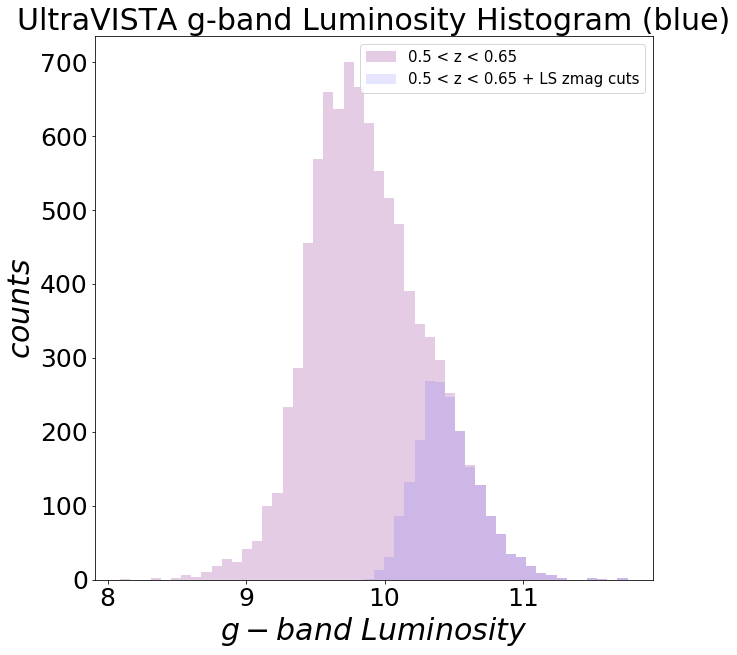

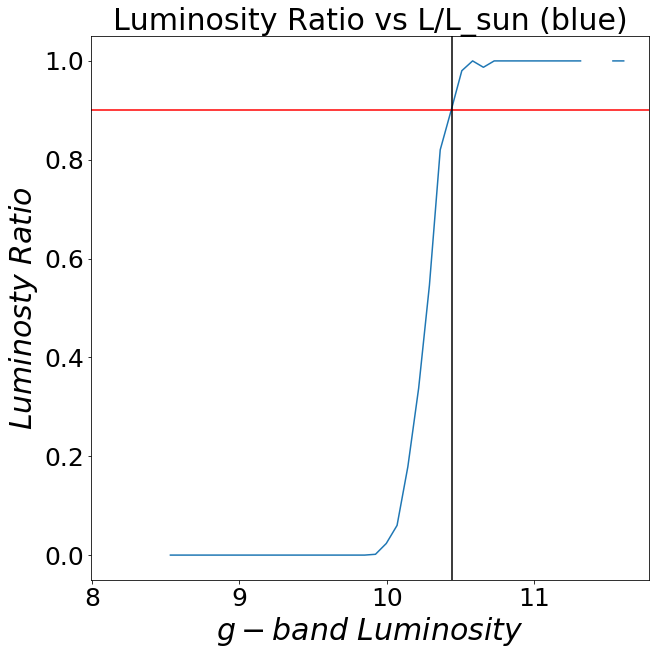

In [69]:
UV_zcut_blue, zcut_bins_blue = np.histogram(log_gLum_blue_z, bins=50)
UV_LScut_blue, nouse_bins = np.histogram(log_gLum_blue_LS, bins=zcut_bins_blue)
print(zcut_bins_blue)
print('----')
# print(LScut_bins)

ratio_blue = UV_LScut_blue/UV_zcut_blue
print(ratio_blue)

plt.subplots(figsize=(10,10))
plt.hist(log_gLum_blue_z, bins=zcut_bins_blue, alpha=0.2, color='purple', label="0.5 < z < 0.65")
plt.hist(log_gLum_blue_LS, bins=zcut_bins_blue, alpha=0.1, color='blue', label="0.5 < z < 0.65 + LS zmag cuts")
plt.title("UltraVISTA g-band Luminosity Histogram (blue)", fontsize=30)
plt.xlabel(r'$g-band$ $Luminosity$', fontsize=30)
plt.ylabel(r'$counts$', fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.legend(loc='upper right', fontsize=15)
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/7May2020/lum_hist_UVandUVzcut_low_redshift_blue-v1.pdf')
# plt.savefig('/Users/mtownsend/Desktop/NewPaperPlots/lum_hist_UVandUVzcut_z_notNormalized_blue-v2.pdf')
plt.show()

# # 0.2 < z < 0.35
# bins_minus_one = [7.08967521,  7.16916558,  7.24865595,  7.32814632,  7.40763668,
#   7.48712705,  7.56661742,  7.64610779,  7.72559816,  7.80508853,  7.88457889,
#   7.96406926,  8.04355963,  8.12305,     8.20254037,  8.28203073,  8.3615211,
#   8.44101147,  8.52050184,  8.59999221,  8.67948258,  8.75897294,  8.83846331,
#   8.91795368,  8.99744405,  9.07693442,  9.15642479,  9.23591515,  9.31540552,
#   9.39489589,  9.47438626,  9.55387663,  9.633367,    9.71285736,  9.79234773,
#   9.8718381,   9.95132847, 10.03081884, 10.1103092,  10.18979957, 10.26928994,
#  10.34878031, 10.42827068, 10.50776105, 10.58725141, 10.66674178, 10.74623215,
#  10.82572252, 10.90521289]

# # 0.35 < z < 0.5
# bins_minus_one = [7.8816084,   7.9503975,   8.0191866,   8.0879757,   8.1567648,
#   8.2255539,   8.29434299,  8.36313209,  8.43192119,  8.50071029,  8.56949939,
#   8.63828849,  8.70707759,  8.77586668,  8.84465578,  8.91344488,  8.98223398,
#   9.05102308,  9.11981218,  9.18860128,  9.25739038,  9.32617947,  9.39496857,
#   9.46375767,  9.53254677,  9.60133587,  9.67012497,  9.73891407,  9.80770316,
#   9.87649226,  9.94528136, 10.01407046, 10.08285956, 10.15164866, 10.22043776,
#  10.28922685, 10.35801595, 10.42680505, 10.49559415, 10.56438325, 10.63317235,
#  10.70196145, 10.77075055, 10.83953964, 10.90832874, 10.97711784, 11.04590694,
#  11.11469604, 11.18348514]

# 0.5 < z < 0.65
bins_minus_one = [8.1644214,   8.23771175,  8.31100211,  8.38429247,  8.45758283,
  8.53087319,  8.60416355,  8.6774539,   8.75074426,  8.82403462,  8.89732498,
  8.97061534,  9.0439057,   9.11719606,  9.19048641,  9.26377677,  9.33706713,
  9.41035749,  9.48364785,  9.55693821,  9.63022856,  9.70351892,  9.77680928,
  9.85009964,  9.92339,     9.99668036, 10.06997071, 10.14326107, 10.21655143,
 10.28984179, 10.36313215, 10.43642251, 10.50971286, 10.58300322, 10.65629358,
 10.72958394, 10.8028743,  10.87616466, 10.94945501, 11.02274537, 11.09603573,
 11.16932609, 11.24261645, 11.31590681, 11.38919716, 11.46248752, 11.53577788,
 11.60906824, 11.6823586]

# # 0.55 < z < 0.65
# bins_minus_one = [8.25004527,  8.32203478,  8.3940243,   8.46601381,  8.53800333,
#   8.60999284,  8.68198236,  8.75397187,  8.82596139,  8.8979509,   8.96994042,
#   9.04192993,  9.11391945,  9.18590896,  9.25789848,  9.32988799,  9.40187751,
#   9.47386702,  9.54585654,  9.61784605,  9.68983557,  9.76182508,  9.8338146,
#   9.90580411,  9.97779363, 10.04978314, 10.12177266, 10.19376217, 10.26575169,
#  10.3377412,  10.40973072, 10.48172023, 10.55370975, 10.62569926, 10.69768878,
#  10.76967829, 10.84166781, 10.91365732, 10.98564684, 11.05763635, 11.12962587,
#  11.20161538, 11.2736049,  11.34559441, 11.41758393, 11.48957344, 11.56156296,
#  11.63355247, 11.70554199]

# # 0.2 < z < 0.3
# bins_minus_one = [7.08967521,  7.16916558,  7.24865595,  7.32814632,  7.40763668,
#   7.48712705,  7.56661742,  7.64610779,  7.72559816,  7.80508853,  7.88457889,
#   7.96406926,  8.04355963,  8.12305,     8.20254037,  8.28203073,  8.3615211,
#   8.44101147,  8.52050184,  8.59999221,  8.67948258,  8.75897294,  8.83846331,
#   8.91795368,  8.99744405,  9.07693442,  9.15642479,  9.23591515,  9.31540552,
#   9.39489589,  9.47438626,  9.55387663,  9.633367,    9.71285736,  9.79234773,
#   9.8718381,   9.95132847, 10.03081884, 10.1103092,  10.18979957, 10.26928994,
#  10.34878031, 10.42827068, 10.50776105, 10.58725141, 10.66674178, 10.74623215,
#  10.82572252, 10.90521289]

# # 0.3 < z < 0.4
# bins_minus_one = [7.88684306,  7.95552533,  8.0242076,   8.09288986,  8.16157213,
#   8.2302544,   8.29893667,  8.36761894,  8.43630121,  8.50498348,  8.57366575,
#   8.64234802,  8.71103028,  8.77971255,  8.84839482,  8.91707709,  8.98575936,
#   9.05444163,  9.1231239,   9.19180617,  9.26048844,  9.32917071,  9.39785297,
#   9.46653524,  9.53521751,  9.60389978,  9.67258205,  9.74126432,  9.80994659,
#   9.87862886,  9.94731113, 10.01599339, 10.08467566, 10.15335793, 10.2220402,
#  10.29072247, 10.35940474, 10.42808701, 10.49676928, 10.56545155, 10.63413382,
#  10.70281608, 10.77149835, 10.84018062, 10.90886289, 10.97754516, 11.04622743,
#  11.1149097,  11.18359197]

# 0.4 < z < 0.55
# bins_minus_one = [7.87920487,  7.94559044,  8.01197601,  8.07836158,  8.14474715,
#   8.21113271,  8.27751828,  8.34390385,  8.41028942,  8.47667499,  8.54306056,
#   8.60944613,  8.67583169,  8.74221726,  8.80860283,  8.8749884,   8.94137397,
#   9.00775954,  9.07414511,  9.14053067,  9.20691624,  9.27330181,  9.33968738,
#   9.40607295,  9.47245852,  9.53884408,  9.60522965,  9.67161522,  9.73800079,
#   9.80438636,  9.87077193,  9.9371575,  10.00354306, 10.06992863, 10.1363142,
#  10.20269977, 10.26908534, 10.33547091, 10.40185647, 10.46824204, 10.53462761,
#  10.60101318, 10.66739875, 10.73378432, 10.80016989, 10.86655545, 10.93294102,
#  10.99932659, 11.06571216]

# 0.4 < z < 0.5
# bins_minus_one = [7.87783898,  7.94285865,  8.00787833,  8.072898,    8.13791768,
#   8.20293735,  8.26795703,  8.3329767,   8.39799638,  8.46301605,  8.52803573,
#   8.5930554,   8.65807508,  8.72309475,  8.78811443,  8.8531341,   8.91815378,
#   8.98317345,  9.04819312,  9.1132128,   9.17823247,  9.24325215,  9.30827182,
#   9.3732915,   9.43831117,  9.50333085,  9.56835052,  9.6333702,   9.69838987,
#   9.76340955,  9.82842922,  9.8934489,   9.95846857, 10.02348825, 10.08850792,
#  10.1535276,  10.21854727, 10.28356695, 10.34858662, 10.41360629, 10.47862597,
#  10.54364564, 10.60866532, 10.67368499, 10.73870467, 10.80372434, 10.86874402,
#  10.93376369, 10.99878337]

# 0.5 < z < 0.6
# bins_mins_one = [8.15946544,  8.22779984,  8.29613425,  8.36446865,  8.43280305,
#   8.50113745,  8.56947186,  8.63780626,  8.70614066,  8.77447506,  8.84280947,
#   8.91114387,  8.97947827,  9.04781267,  9.11614708,  9.18448148,  9.25281588,
#   9.32115029,  9.38948469,  9.45781909,  9.52615349,  9.5944879,   9.6628223,
#   9.7311567,   9.7994911,   9.86782551,  9.93615991, 10.00449431, 10.07282871,
#  10.14116312, 10.20949752, 10.27783192, 10.34616632, 10.41450073, 10.48283513,
#  10.55116953, 10.61950394, 10.68783834, 10.75617274, 10.82450714, 10.89284155,
#  10.96117595, 11.02951035, 11.09784475, 11.16617916, 11.23451356, 11.30284796,
#  11.37118236, 11.43951677]

# # 0.5 < z < 0.65
# bins_minus_one = [8.782304,    8.84298451,  8.90366502,  8.96434553,  9.02502604,
#   9.08570655,  9.14638706,  9.20706757,  9.26774808,  9.32842859,  9.3891091,
#   9.44978961,  9.51047012,  9.57115062,  9.63183113,  9.69251164,  9.75319215,
#   9.81387266,  9.87455317,  9.93523368,  9.99591419, 10.0565947,  10.11727521,
#  10.17795572, 10.23863623, 10.29931674, 10.35999724, 10.42067775, 10.48135826,
#  10.54203877, 10.60271928, 10.66339979, 10.7240803,  10.78476081, 10.84544132,
#  10.90612183, 10.96680234, 11.02748285, 11.08816335, 11.14884386, 11.20952437,
#  11.27020488, 11.33088539, 11.3915659,  11.45224641, 11.51292692, 11.57360743,
#  11.63428794, 11.69496845]

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(bins_minus_one, ratio_blue[:-1])
plt.axhline(y=0.9, color='red')
plt.axvline(x=10.44, color='black')
plt.title("Luminosity Ratio vs L/L_sun (blue)", fontsize=30)
plt.xlabel(r'$g-band$ $Luminosity$', fontsize=30)
plt.ylabel(r'$Luminosty$ $Ratio$', fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=25)
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/06Aug2020/luminosity_hist_ratio_blue_0.4-0.55.pdf.pdf')
# plt.savefig('/Users/mtownsend/Desktop/NewPaperPlots/luminosity_hist_ratio_blue-v4.pdf')
fig.show()

In [9]:
UV_zcut_all, zcut_bins_all = np.histogram(log_LV[np.where((zphot > 0.55) & (zphot < 0.65))], bins=50)
UV_LScut_all, nouse_bins = np.histogram(log_LV[np.where((zmag < 22.36) & (zphot > 0.55) & (zphot < 0.65))], bins=zcut_bins_all)
print(zcut_bins_all)
print('----')
# print(LScut_bins)

ratio_all = UV_LScut_all/UV_zcut_all
print(ratio_all)

plt.subplots(figsize=(10,10))
plt.hist(log_LV[np.where((zphot > 0.55) & (zphot < 0.65))], bins=zcut_bins_all, alpha=0.2, color='orange', label="0.55<z<0.65")
plt.hist(log_LV[np.where((zmag < 22.36) & (zphot > 0.55) & (zphot < 0.65))], bins=zcut_bins_all, alpha=0.1, color='blue', label="0.55<z<0.65 + LS zmag cuts")
plt.title("UltraVISTA Luminosity Histogram (all)", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$counts$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc='upper right', fontsize=15)
plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/lum_hist_UVandUVzcut_V_notNormalized_all-v3.jpeg')
plt.savefig('/Users/mtownsend/Desktop/lum_hist_UVandUVzcut_V_notNormalized_all-v3.pdf')
plt.show()

bins_minus_one = [7.72880458,  7.83848155,  7.94815852,  8.05783549,  8.16751245,
  8.27718942,  8.38686639,  8.49654336,  8.60622032,  8.71589729,  8.82557426,
  8.93525123,  9.0449282,   9.15460516,  9.26428213,  9.3739591,   9.48363607,
  9.59331303,  9.70299,     9.81266697,  9.92234394, 10.0320209,  10.14169787,
 10.25137484, 10.36105181, 10.47072877, 10.58040574, 10.69008271, 10.79975968,
 10.90943665, 11.01911361, 11.12879058, 11.23846755, 11.34814452, 11.45782148,
 11.56749845, 11.67717542, 11.78685239, 11.89652935, 12.00620632, 12.11588329,
 12.22556026, 12.33523723, 12.44491419, 12.55459116, 12.66426813, 12.7739451,
 12.88362206, 12.99329903]

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(bins_minus_one, ratio_all[:-1])
plt.axhline(y=0.9, color='red')
plt.title("UV with LS cuts / UV with Redshift Cuts vs L/L_sun (all)", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$LS Cuts / Z Cuts$', fontsize=20)
# plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/luminosity_hist_ratio_all-v3.jpeg')
# plt.savefig('/Users/mtownsend/Desktop/luminosity_hist_ratio_all-v3.pdf')
fig.show()

NameError: name 'zphot' is not defined

In [ ]:
log_LV_blue_LS = log_LV[np.where((UVcolor < 1.3) & (zphot > 0.55) & (zphot < 0.65) & (zmag < 22.36))]
log_LV_red_LS = log_LV[np.where((UVcolor > 1.3) & (zphot > 0.55) & (zphot < 0.65) & (zmag < 22.36))]

log_LV_blue_z = log_LV[np.where((UVcolor < 1.3) & (zphot > 0.55) & (zphot < 0.65))]
log_LV_red_z = log_LV[np.where((UVcolor > 1.3) & (zphot > 0.55) & (zphot < 0.65))]
   
    
print(len(log_LV_blue_LS))
print(len(log_LV_red_LS))
print(len(log_LV_blue_z))
print(len(log_LV_red_z))

In [ ]:
UV_zcut_red, zcut_bins_red = np.histogram(log_LV_red_z, bins=50)
UV_LScut_red, nouse_bins = np.histogram(log_LV_red_LS, bins=zcut_bins_red)
print(zcut_bins_red)
print('----')
# print(LScut_bins)

ratio_red = UV_LScut_red/UV_zcut_red
print(ratio_red)

plt.subplots(figsize=(10,10))
plt.hist(log_LV_red_z, bins=zcut_bins_red, alpha=0.2, color='orange', label="0.55<z<0.65")
plt.hist(log_LV_red_LS, bins=zcut_bins_red, alpha=0.1, color='blue', label="0.55<z<0.65 + LS zmag cuts")
plt.title("UltraVISTA Luminosity Histogram (red)", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$counts$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc='upper right', fontsize=15)
plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/lum_hist_UVandUVzcut_V_Normalized_red-v2.jpeg')
plt.savefig('/Users/mtownsend/Desktop/lum_hist_UVandUVzcut_V_Normalized_red-v2.pdf')
plt.show()

bins_minus_one = [7.75760615,  7.86669533,  7.97578451,  8.08487369,  8.19396287,
  8.30305205,  8.41214123,  8.52123041,  8.63031959,  8.73940877,  8.84849795,
  8.95758713,  9.06667632,  9.1757655,   9.28485468,  9.39394386,  9.50303304,
  9.61212222,  9.7212114,   9.83030058,  9.93938976, 10.04847894, 10.15756812,
 10.2666573,  10.37574648, 10.48483566, 10.59392484, 10.70301402, 10.81210321,
 10.92119239, 11.03028157, 11.13937075, 11.24845993, 11.35754911, 11.46663829,
 11.57572747, 11.68481665, 11.79390583, 11.90299501, 12.01208419, 12.12117337,
 12.23026255, 12.33935173, 12.44844092, 12.5575301,  12.66661928, 12.77570846,
 12.88479764, 12.99388682]

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(bins_minus_one, ratio_red[:-1])
plt.axhline(y=0.9, color='red')
plt.title("UV with LS cuts / UV with Redshift Cuts vs L/L_sun (red)", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$LS Cuts / Z Cuts$', fontsize=20)
plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/luminosity_hist_ratio_red-v3.jpeg')
plt.savefig('/Users/mtownsend/Desktop/luminosity_hist_ratio_red-v3.pdf')
fig.show()

In [ ]:
UV_zcut_blue, zcut_bins_blue = np.histogram(log_LV_blue_z, bins=50)
UV_LScut_blue, nouse_bins = np.histogram(log_LV_blue_LS, bins=zcut_bins_blue)
print(zcut_bins_blue)
print('----')
# print(LScut_bins)

ratio_blue = UV_LScut_blue/UV_zcut_blue
print(ratio_blue)

plt.subplots(figsize=(10,10))
plt.hist(log_LV_blue_z, bins=zcut_bins_blue, alpha=0.2, color='orange', label="0.55<z<0.65")
plt.hist(log_LV_blue_LS, bins=zcut_bins_blue, alpha=0.1, color='blue', label="0.55<z<0.65 + LS zmag cuts")
plt.title("UltraVISTA Luminosity Histogram (blue)", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$counts$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc='upper right', fontsize=15)
plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/lum_hist_UVandUVzcut_V_notNormalized_blue-v2.jpeg')
plt.savefig('/Users/mtownsend/Desktop/lum_hist_UVandUVzcut_V_notNormalized_blue-v2.pdf')
plt.show()

bins_minus_one = [7.69987978,  7.78063195,  7.86138412,  7.94213629,  8.02288846,
  8.10364063,  8.18439279,  8.26514496,  8.34589713,  8.4266493,   8.50740147,
  8.58815364,  8.66890581,  8.74965797,  8.83041014,  8.91116231,  8.99191448,
  9.07266665,  9.15341882,  9.23417098,  9.31492315,  9.39567532,  9.47642749,
  9.55717966,  9.63793183,  9.718684,    9.79943616,  9.88018833,  9.9609405,
 10.04169267, 10.12244484, 10.20319701, 10.28394917, 10.36470134, 10.44545351,
 10.52620568, 10.60695785, 10.68771002, 10.76846218, 10.84921435, 10.92996652,
 11.01071869, 11.09147086, 11.17222303, 11.2529752,  11.33372736, 11.41447953,
 11.4952317,  11.57598387]

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(bins_minus_one, ratio_blue[:-1])
plt.axhline(y=0.9, color='red')
plt.title("UV with LS cuts / UV with Redshift Cuts vs L/L_sun (blue)", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$LS Cuts / Z Cuts$', fontsize=20)
plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/luminosity_hist_ratio_blue-v2.jpeg')
plt.savefig('/Users/mtownsend/Desktop/luminosity_hist_ratio_blue-v2.pdf')
fig.show()

In [ ]:
# UltraVISTA apparent magnitudes

from astropy.io import ascii
data_cat = ascii.read("/Users/mtownsend/eazy-photoz/inputs/UVISTA_master_v4.1.cat")  
# print(data_cat)   

# print(len(data_cat['gp']))
gp = data_cat['gp']
rp = data_cat['rp']
zp = data_cat['zp']
use = data_cat['USE']
# z = data_cat['z_spec']

cut = np.where((np.asarray(gp) > 0.) & (np.asarray(rp) > 0.) & (np.asarray(zp) > 0.) & (zarr > 0.) & (use == 1))
cut0 = cut[0]
print(type(cut0))

gmag = 22.5 - 2.5 * np.log10(gp[cut])
rmag = 22.5 - 2.5 * np.log10(rp[cut])
zmag = 22.5 - 2.5 * np.log10(zp[cut])

zphot = zarr[cut]
# DMarr = np.array(DM)
DM_new = DMarr[cut]



In [ ]:
print(cut0.shape)
print(cut0)
print(cut0[2])

In [ ]:
# calculate rest-frame magnitudes

K_correct = -2.5*np.log10((1. + zphot)**-1.)
print(len(K_correct))
# print(len(zphot[np.where(zmag <= 22.36)]))
# print(len(rmag_LRG[np.where(zmag_LRG <= 22.36)]))

Mr = rmag - DM_new - K_correct
print(len(Mr))
# Mg = gmag - DM_cut - K_correct
# print(len(Mg))


# calculate rest-frame colors

# Lg = np.array(L_gfilter)
# Lr = np.array(L_rfilter)

# grcolor_LRG = -2.5*np.log10(Lg/Lr)
# print(grcolor_LRG)

# calculate UltraVISTA luminosities 

# absolute magnitudes of the sun in DECaM g, r, and z filters from Willmer ApJS, 2018
Msun_g = 5.05
Msun_r = 4.61
Msun_z = 4.50

# calculate L_g/Lsun_g
L_r = 10.**((Mr-Msun_r)/(-2.5))

print(len(L_r[np.where(L_r == 0.)]))
print(len(L_r))


In [ ]:
# plt.subplots(figsize=(10,10))
# plt.hist(np.log10(L_r), bins=50, alpha=0.5, color='indigo', label="UV 0.2 < z < 0.65")
# plt.title("UltraVISTA r-band Luminosity Histogram", fontsize=20)
# plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
# plt.ylabel(r'$counts$', fontsize=20)
# plt.legend(fontsize=12)
# # plt.gca().invert_xaxis()
# plt.savefig('/Users/mtownsend/Desktop/UV_lum_hist_LSzcut-v1.jpeg')
# plt.savefig('/Users/mtownsend/Desktop/UV_lum_hist_LSzcut-v1.pdf')
# plt.show()


plt.subplots(figsize=(10,10))
plt.hist(zphot, bins=50, alpha=0.5, color='indigo')
plt.title("UltraVISTA Redshift Histogram", fontsize=20)
plt.xlabel(r'$Redshift$', fontsize=20)
plt.ylabel(r'$counts$', fontsize=20)
# plt.legend(fontsize=12)
# plt.gca().invert_xaxis()
plt.savefig('/Users/mtownsend/Desktop/UV_redshift_hist-v1.jpeg')
plt.savefig('/Users/mtownsend/Desktop/UV_redshift_hist-v1.pdf')
plt.show()


In [ ]:
# same as previous cell but make redshift cuts

LS_cut = np.where((zphot >= 0.55) & (zphot <= 0.65) & (zmag <= 22.36))
# LRG_cut = np.where(zmag <= 22.36)

gmag_cut = gmag[LS_cut]
rmag_cut = rmag[LS_cut]
zmag_cut = zmag[LS_cut]

z_cut = zphot[LS_cut]
DM_cut = DM_new[LS_cut]

# calculate UltraVISTA rest-frame magnitudes

K_correct_cut = -2.5*np.log10((1. + z_cut)**(-1.))

Mr_cut = rmag_cut - DM_cut - K_correct_cut
print(len(Mr_cut))


In [ ]:
# same as previous cell but make redshift cuts

z_cut = np.where((zphot >= 0.55) & (zphot <= 0.65))
# LRG_cut = np.where(zmag <= 22.36)

gmag_zcut = gmag[z_cut]
rmag_zcut = rmag[z_cut]
zmag_zcut = zmag[z_cut]

z_zcut = zphot[z_cut]
DM_zcut = DM_new[z_cut]

# calculate UltraVISTA rest-frame magnitudes

K_correct_zcut = -2.5*np.log10((1. + z_zcut)**(-1.))

Mr_zcut = rmag_zcut - DM_zcut - K_correct_zcut
print(len(Mr_zcut))


In [ ]:
plt.subplots(figsize=(10,10))
# plt.hist(Mr, bins=50, alpha=0.5, color='blue', label="Full UV")
plt.hist(Mr_zcut, bins=50, alpha=0.5, color='green', label="UV 0.55 < z < 0.65")
plt.hist(Mr_cut, bins=50, alpha=0.5, color='red', label="UV 0.55 < z < 0.65 with zmag cuts")
plt.title("UltraVISTA Absolute Magnitude Histogram", fontsize=20)
plt.xlabel(r'$M_{r}$', fontsize=20)
plt.ylabel(r'$counts$', fontsize=20)
plt.legend(fontsize=12)
plt.gca().invert_xaxis()
plt.show()

In [ ]:
# calculate UltraVISTA luminosities 

# absolute magnitudes of the sun in DECaM g, r, and z filters from Willmer ApJS, 2018
Msun_g = 5.05
Msun_r = 4.61
Msun_z = 4.50

# calculate L_g/Lsun_g
L_r = 10.**((Mr-Msun_r)/(-2.5))

print(len(L_r[np.where(L_r == 0.)]))


In [ ]:
# calculate the above using my project cuts: (z_LRG1 >= 0.2) & (z_LRG1 <= 0.65) & (zmag_LRG <= 22.36)

LRG_cut = np.where((zphot >= 0.2) & (zphot <= 0.65)) # & (zmag <= 22.36))

gmag_cut = gmag[LRG_cut]
rmag_cut = rmag[LRG_cut]
zmag_cut = zmag[LRG_cut]

z_cut = zphot[LRG_cut]
DM_cut = DM_new[LRG_cut]

# calculate UltraVISTA rest-frame magnitudes

K_correct_cut = -2.5*np.log10((1. + z_cut)**(-1.))

Mr_cut = rmag_cut - DM_cut - K_correct_cut
print(len(Mr_cut))



# absolute magnitudes of the sun in DECaM g, r, and z filters from Willmer ApJS, 2018
Msun_g = 5.05
Msun_r = 4.61
Msun_z = 4.50

# calculate L_g/Lsun_g
L_r_cut = 10.**((Mr_cut-Msun_r)/(-2.5))

print(len(L_r_cut[np.where(L_r_cut == 0.)]))

In [ ]:
# absolute magnitudes of the sun in DECaM g, r, and z filters from Willmer ApJS, 2018
Msun_g = 5.05
Msun_r = 4.61
Msun_z = 4.50

# calculate L_g/Lsun_g
L_r_zcut = 10.**((Mr_zcut-Msun_r)/(-2.5))

print(len(L_r_zcut[np.where(L_r_zcut == 0.)]))

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


log_Lr = np.log10(L_r)
log_Lr_cut = np.log10(L_r_cut)
log_Lr_zcut = np.log10(L_r_zcut)

plt.subplots(figsize=(10,10))
plt.hist(log_Lr, bins=50, alpha=0.3, color='purple', label="0.2 < z < 0.65", normed='True')
# plt.hist(log_Lr_zcut, bins=50, alpha=0.3, color='green', label="UV with Redshift Cuts")
# plt.hist(log_Lr_cut, bins=50, alpha=0.2, color='blue', label="UV with Legacy Survey Cuts", normed='True')
plt.title("UltraVISTA Luminosity Histogram (only LS redshift cut)", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$counts$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc='upper right', fontsize=15)
plt.savefig('/Users/mtownsend/Desktop/UV_lum_hist_LSzcut.jpeg')
plt.savefig('/Users/mtownsend/Desktop/UV_lum_hist_LSzcut.pdf')
plt.show()


In [ ]:
UV_zcut, zcut_bins = np.histogram(log_Lr_zcut, bins=50)
UV_LScut, nouse_bins = np.histogram(log_Lr_cut, bins=zcut_bins)
print(zcut_bins)
print('----')
# print(LScut_bins)

ratio = UV_LScut/UV_zcut
print(ratio)

plt.subplots(figsize=(10,10))
# plt.hist(log_Lr, bins=50, alpha=0.2, color='purple', label="Full UV", normed='True')
plt.hist(log_Lr_zcut, bins=40, alpha=0.3, color='green', label="UV with Redshift Cuts")
plt.hist(log_Lr_cut, bins=zcut_bins, alpha=0.2, color='blue', label="UV with Legacy Survey Cuts")
plt.title("UltraVISTA Luminosity Histogram", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$counts$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc='upper right', fontsize=15)
# plt.savefig('/Users/mtownsend/Desktop/lum_hist_UVandUVzcut_r_notNormalized.jpeg')
# plt.savefig('/Users/mtownsend/Desktop/lum_hist_UVandUVzcut_r_notNormalized.pdf')
plt.show()

bins_minus_one = [8.66866755,  8.74495446,  8.82124137,  8.89752828,  8.97381518,
  9.05010209,  9.126389,    9.20267591,  9.27896282,  9.35524972,  9.43153663,
  9.50782354,  9.58411045,  9.66039736,  9.73668427,  9.81297117,  9.88925808,
  9.96554499, 10.0418319,  10.11811881, 10.19440572, 10.27069262, 10.34697953,
 10.42326644, 10.49955335, 10.57584026, 10.65212717, 10.72841407, 10.80470098,
 10.88098789, 10.9572748,  11.03356171, 11.10984861, 11.18613552, 11.26242243,
 11.33870934, 11.41499625, 11.49128316, 11.56757006, 11.64385697, 11.72014388,
 11.79643079, 11.8727177,  11.94900461, 12.02529151, 12.10157842, 12.17786533,
 12.25415224, 12.33043915]

fig, ax = plt.subplots(figsize=(10,10))
plt.axhline(y=0.9, color='red')
ax.plot(bins_minus_one, ratio[:-1])
plt.title("UV with LS cuts / UV with Redshift Cuts vs L/L_sun (all)", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$LS Cuts / Z Cuts$', fontsize=20)
plt.savefig('/Users/mtownsend/Desktop/luminosity_hist_ratio_all-v1.jpeg')
plt.savefig('/Users/mtownsend/Desktop/luminosity_hist_ratio_all-v1.pdf')
fig.show()

In [ ]:
log_Lr = np.log10(L_r)
log_Lr_zcut = np.log10(L_r_zcut)

f, ax = plt.subplots(figsize=(10,10))
ax.scatter(zphot, log_Lr, s=1, c='purple', label='Full UV')
ax.scatter(z_zcut, log_Lr_zcut, s=1, c='blue', label='UV with Redshift Cuts')
plt.title("UltraVISTA Luminosity in r-band vs redshift", fontsize=22)
plt.xlabel(r'$redshift$', fontsize=20)
plt.ylabel(r'$log(L_r/L_{sun,r})$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc='lower right', fontsize=15, markerscale=5)
plt.savefig('/Users/mtownsend/Desktop/lum_v_redshift_r-v2.jpeg')
plt.savefig('/Users/mtownsend/Desktop/lum_v_redshift_r-v2.pdf')
plt.show()

In [ ]:
# Schechter function????
import numpy as np

def schechter_luminosity_function(phistar, L, Lstar, alpha):
    return (phistar/Lstar) * (L/Lstar)**(alpha) * np.exp(-L/Lstar)

Lsun = 3.9e33
phistar = 0.008
Lstar = 1e10 * Lsun
alpha = -0.7

L = L_r * Lsun

L_cut = L_r_cut * Lsun

phi = schechter_luminosity_function(phistar, L, Lstar, alpha)
# print(L_r)
print(max(phi))
print(min(phi))
print(max(L_r))
print(min(L_r))
# print(Lstar)

phi_cut = schechter_luminosity_function(phistar, L_cut, Lstar, alpha)

In [15]:
# read in EAZY outputs
# only need 3rd, 6th, and 7th columns

from astropy.io import ascii
data1 = open('/Users/mtownsend/eazy-photoz/inputs/OUTPUT/UVISTA_master_v4.1/UVISTA_final_v4.1.153-155.rf', 'r')
lines1 = data1.readlines()[11:]

z1 = []
DM1 = []
LU1 = []
LV1 = []

for line in lines1:
    p = line.split()
    z1.append(float(p[1]))
    DM1.append(float(p[2]))
    LU1.append(float(p[5]))
    LV1.append(float(p[6]))
    
ztemp1 = np.array(z1)
DMtemp1 = np.array(DM1)
LUtemp1 = np.array(LU1)
LVtemp1 = np.array(LV1)

data2 = open('/Users/mtownsend/eazy-photoz/inputs/OUTPUT/UVISTA_master_v4.1/UVISTA_final_v4.1.155-161.rf', 'r')
lines2 = data2.readlines()[11:]

z2 = []
DM2 = []
LV2 = []
LJ = []

for line in lines2:
    p = line.split()
    z2.append(float(p[1]))
    DM2.append(float(p[2]))
    LV2.append(float(p[5]))
    LJ.append(float(p[6]))
    
ztemp2 = np.array(z2)
DMtemp2 = np.array(DM2)
LVtemp2 = np.array(LV2)
LJtemp = np.array(LJ)


data_cat = ascii.read("/Users/mtownsend/eazy-photoz/inputs/UVISTA_master_v4.1.cat")

gp = data_cat['gp']
rp = data_cat['rp']
zp = data_cat['zp']
use = data_cat['USE']

print(len(gp))
print(len(LUtemp1))

262615
262615


In [19]:
# UltraVISTA apparent magnitudes

# cut = np.where((np.asarray(gp) > 0.) & (np.asarray(rp) > 0.) & (np.asarray(zp) > 0.) & (np.asarray(z) > 0.) &(use == 1))
# cut0 = cut[0]
# print(type(cut0))

# gmag = 22.5 - 2.5 * np.log10(gp[cut])
# rmag = 22.5 - 2.5 * np.log10(rp[cut])
# zmag = 22.5 - 2.5 * np.log10(zp[cut])

# zphot = zarr[cut]
# DMarr = np.array(DM)
# DM_new = DMarr[cut]


# cut1 = np.where((ztemp1 > 0.) & (LVtemp1 > 0.) & (LUtemp1 > 0.) & (use == 1) & (np.asarray(gp) > 0.) & (np.asarray(rp) > 0.) & (np.asarray(zp) > 0.) & (np.asarray(z) > 0.))
# cut2 = np.where((ztemp2 > 0.) & (LVtemp2 > 0.) & (LJtemp > 0.) & (use == 1) & (np.asarray(gp) > 0.) & (np.asarray(rp) > 0.) & (np.asarray(zp) > 0.) & (np.asarray(z) > 0.))
    
zarr1 = np.array(ztemp1[cut])
DMarr1 = np.array(DMtemp1[cut])
LUarr1 = np.array(LUtemp1[cut])
LVarr1 = np.array(LVtemp1[cut])
# zarr2 = np.array(ztemp2[cut])
DMarr2 = np.array(DMtemp2[cut])
LJarr = np.array(LJtemp[cut])
LVarr2 = np.array(LVtemp2[cut])

# gmag = 22.5 - 2.5 * np.log10(gp[cut])
# rmag = 22.5 - 2.5 * np.log10(rp[cut])
# zmag = 22.5 - 2.5 * np.log10(zp[cut])

# zphot = zarr[cut]
# DMarr = np.array(DM)
# DM_new = DMarr[cut]

# print(len(zarr))
# print(len(DMarr))
# print(len(LUarr))
# print(len(LVarr))
# print(len(Varr))



In [21]:
# calculate rest-frame magnitudes

# K_correct = -2.5*np.log10((1. + zarr)**-1.)

# MV = Vmag - DMarr - K_correct
# MV2 = Vmag2 - DMarr - K_correct

# calculate rest-frame colors

UVcolor1 = -2.5*np.log10(LUarr1/LVarr1)
VJcolor1 = -2.5*np.log10(LVarr2/LJarr)
print(len(UVcolor))

166641


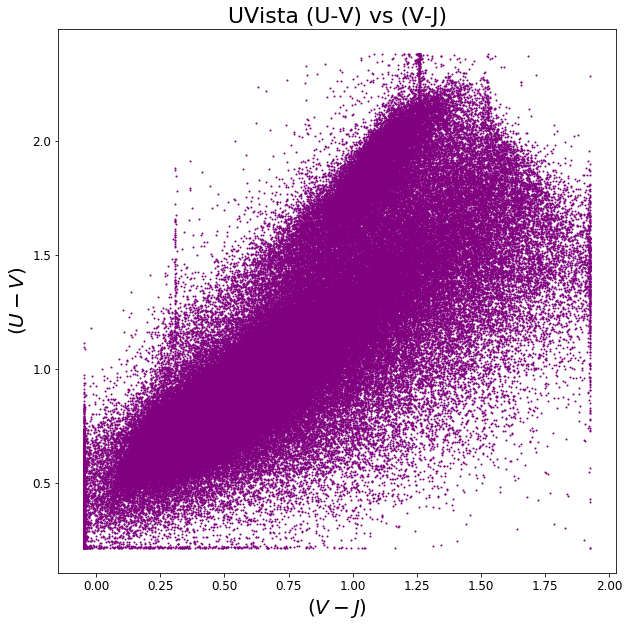

In [23]:
# Plot (U-V) vs. V

f, ax = plt.subplots(figsize=(10,10))
# ax.scatter(MV[np.where(zarr < 1.)], UVcolor[np.where(zarr < 1.)], s=1, c='purple')
# ax.scatter(VJcolor[np.where((zarr1 > 0.5) & (zarr1 > 1.))], UVcolor[np.where((zarr1 > 0.5) & (zarr1 > 1.))], s=1, c='purple')
ax.scatter(VJcolor1, UVcolor1, s=1, c='purple')
plt.title("UVista (U-V) vs (V-J)", fontsize=22)
plt.xlabel(r'$(V-J)$', fontsize=20)
plt.ylabel(r'$(U-V)$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
# plt.gca().invert_xaxis()
# plt.legend(loc='lower right', fontsize=15, markerscale=5)
# plt.savefig('/Users/mtownsend/Desktop/U-V_CMD-v2.jpeg')
# plt.savefig('/Users/mtownsend/Desktop/U-V_CMD-v2.pdf')
plt.show()

In [ ]:
# calculate rest-frame magnitudes

K_correct = -2.5*np.log10((1. + zphot)**-1.)
print(len(K_correct))
# print(len(zphot[np.where(zmag <= 22.36)]))
# print(len(rmag_LRG[np.where(zmag_LRG <= 22.36)]))

Mr = rmag - DM_new - K_correct
print(len(Mr))
# Mg = gmag - DM_cut - K_correct

# calculate UltraVISTA luminosities 

# absolute magnitudes of the sun in DECaM g, r, and z filters from Willmer ApJS, 2018
Msun_g = 5.05
Msun_r = 4.61
Msun_z = 4.50

# calculate L_g/Lsun_g
L_r = 10.**((Mr-Msun_r)/(-2.5))

print(len(L_r[np.where(L_r == 0.)]))

log_Lr_all = np.log10(L_r)
print(len(log_Lr_all))


In [ ]:
log_Lr_blue_LS = log_Lr_all[np.where((UVcolor < 1.3) & (zarr1 > 0.55) & (zarr1 < 0.65) & (zmag < 22.36))]
log_Lr_red_LS = log_Lr_all[np.where((UVcolor > 1.3) & (zarr1 > 0.55) & (zarr1 < 0.65) & (zmag < 22.36))]

log_Lr_blue_z = log_Lr_all[np.where((UVcolor < 1.3) & (zarr1 > 0.55) & (zarr1 < 0.65))]
log_Lr_red_z = log_Lr_all[np.where((UVcolor > 1.3) & (zarr1 > 0.55) & (zarr1 < 0.65))]
   
    
print(len(log_Lr_blue_LS))
print(len(log_Lr_red_LS))
print(len(log_Lr_blue_z))
print(len(log_Lr_red_z))

In [ ]:
UV_zcut_red, zcut_bins_red = np.histogram(log_Lr_red_z, bins=50)
UV_LScut_red, nouse_bins = np.histogram(log_Lr_red_LS, bins=zcut_bins_red)
print(zcut_bins_red)
print('----')
# print(LScut_bins)

ratio_red = UV_LScut_red/UV_zcut_red
print(ratio_red)

plt.subplots(figsize=(10,10))
# plt.hist(log_Lr, bins=30, alpha=0.2, color='purple', label="Full UV", normed='True')
plt.hist(log_Lr_red_z, bins=20, alpha=0.2, color='green') #, label="UV with Redshift Cuts")
plt.hist(log_Lr_red_LS, bins=zcut_bins_red, alpha=0.1, color='blue') #, label="UV with Legacy Survey Cuts")
plt.title("UltraVISTA Luminosity Histogram", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$counts$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc='upper right', fontsize=15)
# plt.savefig('/Users/mtownsend/Desktop/lum_hist_UVandUVzcut_r_notNormalized.jpeg')
# plt.savefig('/Users/mtownsend/Desktop/lum_hist_UVandUVzcut_r_notNormalized.pdf')
plt.show()

bins_minus_one = [8.66202823,  8.73167582,  8.8013234,   8.87097099,  8.94061858,
  9.01026616,  9.07991375,  9.14956134,  9.21920892,  9.28885651,  9.3585041,
  9.42815168,  9.49779927,  9.56744686,  9.63709444,  9.70674203,  9.77638962,
  9.8460372,   9.91568479,  9.98533238, 10.05497996, 10.12462755, 10.19427514,
 10.26392272, 10.33357031, 10.4032179,  10.47286548, 10.54251307, 10.61216066,
 10.68180824, 10.75145583, 10.82110342, 10.890751,   10.96039859, 11.03004618,
 11.09969376, 11.16934135, 11.23898894, 11.30863652, 11.37828411, 11.4479317,
 11.51757928, 11.58722687, 11.65687446, 11.72652204, 11.79616963, 11.86581722,
 11.9354648,  12.00511239]

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(bins_minus_one, ratio_red[:-1])
plt.axhline(y=0.9, color='red')
plt.title("UV with LS cuts / UV with Redshift Cuts vs L/L_sun (red)", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$LS Cuts / Z Cuts$', fontsize=20)
plt.savefig('/Users/mtownsend/Desktop/luminosity_hist_ratio_red-v1.jpeg')
plt.savefig('/Users/mtownsend/Desktop/luminosity_hist_ratio_red-v1.pdf')
fig.show()


In [ ]:
UV_zcut_blue, zcut_bins_blue = np.histogram(log_Lr_blue_z, bins=50)
UV_LScut_blue, nouse_bins = np.histogram(log_Lr_blue_LS, bins=zcut_bins_blue)
print(zcut_bins_blue)
print('----')
# print(LScut_bins)

ratio_blue = UV_LScut_blue/UV_zcut_blue
print(ratio_blue)

plt.subplots(figsize=(10,10))
# plt.hist(log_Lr, bins=30, alpha=0.2, color='purple', label="Full UV", normed='True')
plt.hist(log_Lr_blue_z, bins=50, alpha=0.3, color='green') #, label="UV with Redshift Cuts")
plt.hist(log_Lr_blue_LS, bins=zcut_bins_blue, alpha=0.2, color='blue') #, label="UV with Legacy Survey Cuts")
plt.title("UltraVISTA Luminosity Histogram", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$counts$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(loc='upper right', fontsize=15)
# plt.savefig('/Users/mtownsend/Desktop/lum_hist_UVandUVzcut_r_notNormalized.jpeg')
# plt.savefig('/Users/mtownsend/Desktop/lum_hist_UVandUVzcut_r_notNormalized.pdf')
plt.show()

bins_minus_one = [8.99501123,  9.06463806,  9.13426489,  9.20389173,  9.27351856,
  9.34314539,  9.41277222,  9.48239906,  9.55202589,  9.62165272,  9.69127956,
  9.76090639,  9.83053322,  9.90016006,  9.96978689, 10.03941372, 10.10904056,
 10.17866739, 10.24829422, 10.31792106, 10.38754789, 10.45717472, 10.52680156,
 10.59642839, 10.66605522, 10.73568206, 10.80530889, 10.87493572, 10.94456256,
 11.01418939, 11.08381622, 11.15344306, 11.22306989, 11.29269672, 11.36232356,
 11.43195039, 11.50157722, 11.57120406, 11.64083089, 11.71045772, 11.78008456,
 11.84971139, 11.91933822, 11.98896506, 12.05859189, 12.12821872, 12.19784556,
 12.26747239, 12.33709922]

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(bins_minus_one, ratio_blue[:-1])
plt.axhline(y=0.9, color='red')
plt.title("UV with LS cuts / UV with Redshift Cuts vs L/L_sun (blue)", fontsize=20)
plt.xlabel(r'$log(L/L_{sun})$', fontsize=20)
plt.ylabel(r'$LS Cuts / Z Cuts$', fontsize=20)
plt.savefig('/Users/mtownsend/Desktop/luminosity_hist_ratio_blue-v1.jpeg')
plt.savefig('/Users/mtownsend/Desktop/luminosity_hist_ratio_blue-v1.pdf')
fig.show()